In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')

In [31]:
data = transactions.merge(customers, on='CustomerID', how='left')

In [32]:
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'
})

In [33]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [35]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [36]:
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
inertia = kmeans.inertia_

In [37]:
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia (Sum of Squared Distances): {inertia}")

Davies-Bouldin Index: 0.7951610834130648
Silhouette Score: 0.4663118282405826
Inertia (Sum of Squared Distances): 274.92889415570846


In [38]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

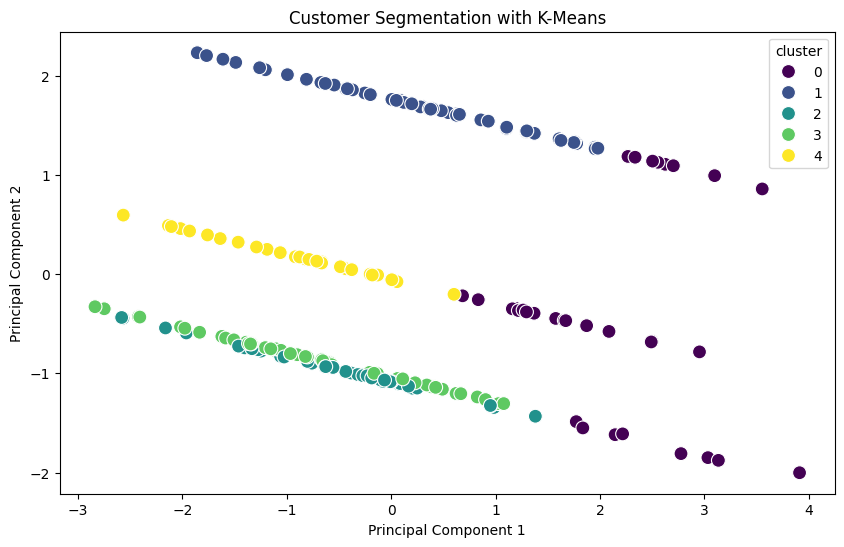

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=customer_data['Cluster'], palette='viridis',s=100)
plt.title("Customer Segmentation with K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='cluster',loc='upper right')
plt.show()